In [8]:
%load_ext autoreload
%autoreload 2
    
import rubin_sim.maf as maf
import numpy as np
import matplotlib.pyplot as plt
from lbg_survey_metrics.constants import *
from lbg_survey_metrics.metrics import *
from lbg_survey_metrics.utils import *
from lbg_survey_metrics.metric_plots import *
from pathlib import Path

In [2]:
# Set parameters that determine LBG cuts
snr_floor = 3 
dropout = 1

In [82]:
# Directory where m5 maps are saved
m5_dir = Path("data/rubin_sim_m5")

u_strat = {
    band: {
        year: {
            scale: {
                expt: {
                    "n_5": np.nan,
                    "n_25": np.nan,
                    "fwfd_100": np.nan,
                    "fwfd_400": np.nan,
                    "fwfd_1000": np.nan,
                    "snr_optim": np.nan,
                    "n_optim": np.nan,
                    "fwfd_optim": np.nan,
                    "Ntot": np.nan,
                }
                for expt in [30, 38, 45, 60]
            }
            for scale in [1.0, 1.1, 1.2, 1.5]
        }
        for year in [1, 4, 7, 10]
    }
    for band in "ugr"
}

for band in u_strat:
    for year in u_strat[band]:
        for scale in u_strat[band][year]:
            for expt in u_strat[band][year][scale]:
                metric_dict = u_strat[band][year][scale][expt]
                
                try:
                    file = f"internal_u_expt{expt}_nscale{str(scale).replace('.', '_')}v3_4_{year}yrs_ExgalM5_{band}.npz"
                    m5 = maf.MetricBundle.load(data_dir / "rubin_sim_m5" / file)
                except:
                    file = None
                    m5 = None
                    continue

                metric_dict["n_5"] = density_for_quantile(0.5, m5, band, snr_floor, dropout)
                metric_dict["n_25"] = density_for_quantile(0.25, m5, band, snr_floor, dropout)
                metric_dict["fwfd_100"] = fwfd_for_density(100, m5, band, snr_floor, dropout)
                metric_dict["fwfd_400"] = fwfd_for_density(400, m5, band, snr_floor, dropout)
                metric_dict["fwfd_1000"] = fwfd_for_density(1_000, m5, band, snr_floor, dropout)

                snr, n, f_wfd = optimize_snr(m5, band, snr_floor, dropout)
                metric_dict["snr_optim"] = snr
                metric_dict["n_optim"] = n
                metric_dict["fwfd_optim"] = f_wfd

                metric_dict["Ntot"] = total_lbgs(m5, band, snr_floor, dropout) 

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

# Number densities at fixed $f_\mathrm{WFD}$

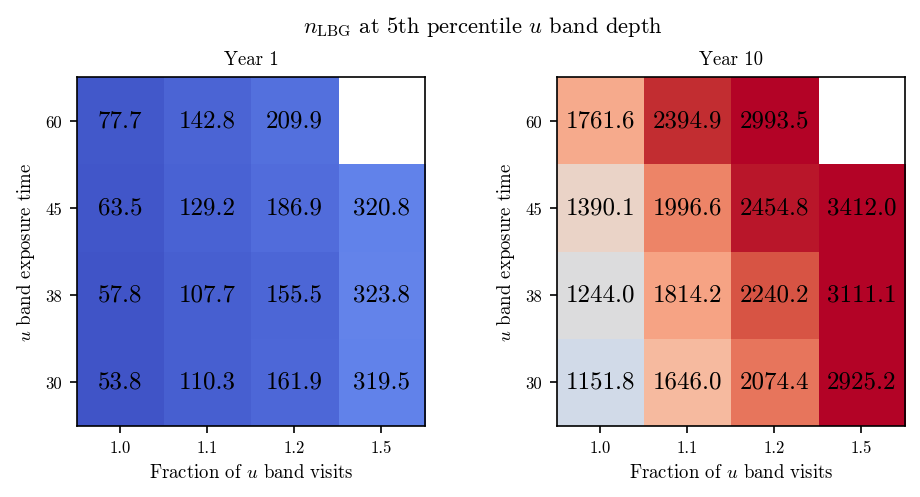

In [72]:
band = "u"
title = "$n_\mathrm{LBG}$ " + f"at 5th percentile ${band}$ band depth"
plot_u_strategy_matrix(u_strat, band, "n_5", title=title, vmin=0, vmax=2500)

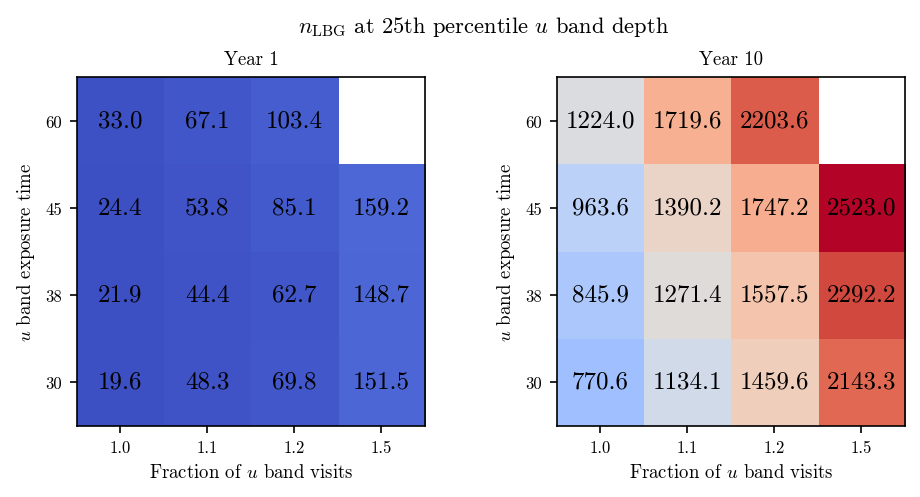

In [73]:
band = "u"
title = "$n_\mathrm{LBG}$ " + f"at 25th percentile ${band}$ band depth"
plot_u_strategy_matrix(u_strat, band, "n_25", title=title, vmin=0, vmax=2500)

# $f_\mathrm{WFD}$ at fixed number density

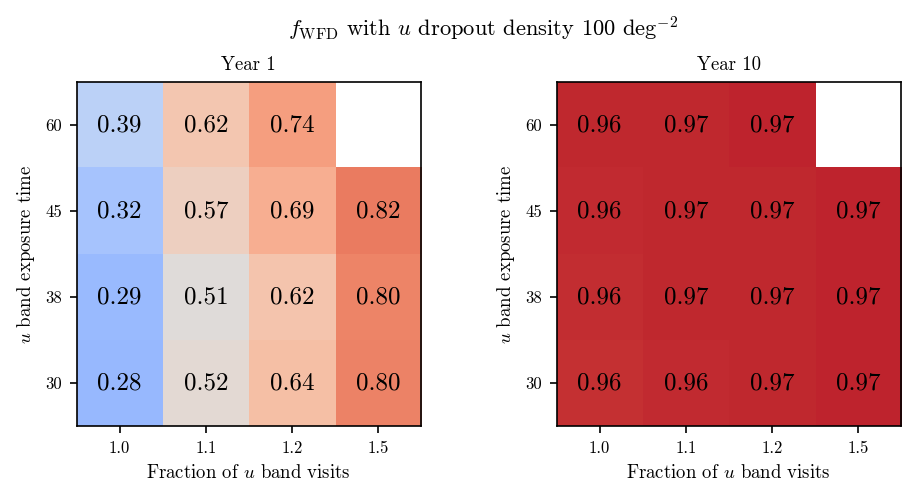

In [74]:
band = "u"
title = "$f_\mathrm{WFD}$ with " + f"${band}$ dropout density " + "100 deg$^{-2}$"
plot_u_strategy_matrix(u_strat, band, "fwfd_100", title=title, vmin=0, vmax=1, two_dec=True)

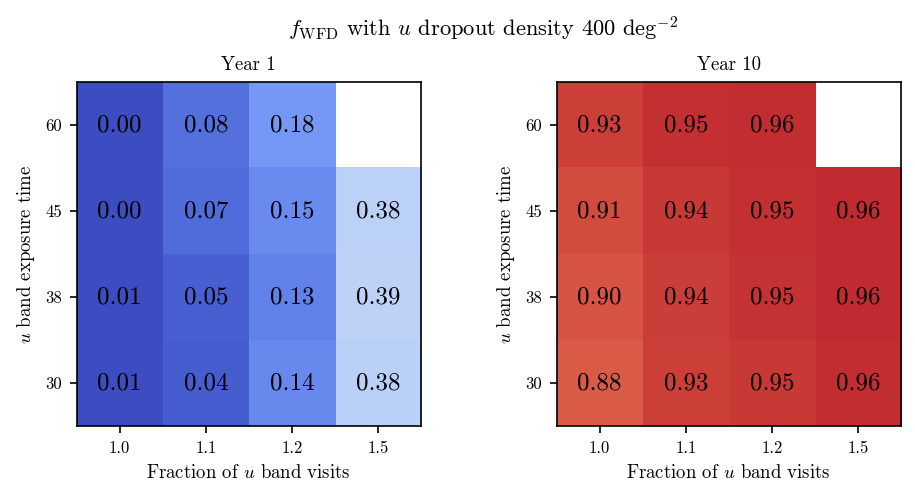

In [75]:
band = "u"
title = "$f_\mathrm{WFD}$ with " + f"${band}$ dropout density " + "400 deg$^{-2}$"
plot_u_strategy_matrix(u_strat, band, "fwfd_400", title=title, vmin=0, vmax=1, two_dec=True)

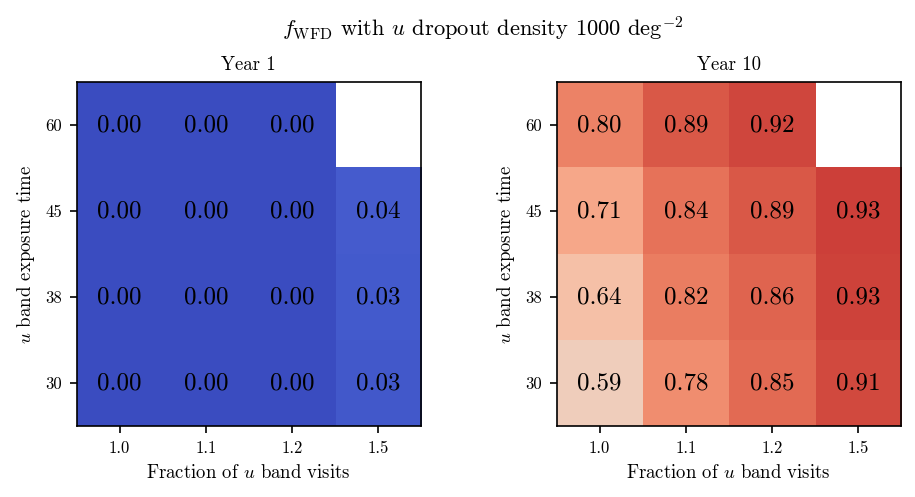

In [76]:
band = "u"
title = "$f_\mathrm{WFD}$ with " + f"${band}$ dropout density " + "1000 deg$^{-2}$"
plot_u_strategy_matrix(u_strat, band, "fwfd_1000", title=title, vmin=0, vmax=1, two_dec=True)

# Optimized SNR metrics

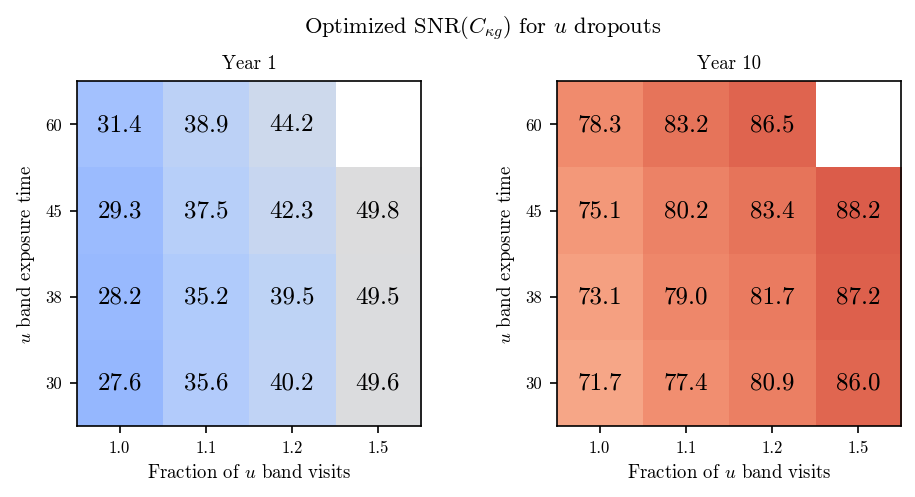

In [121]:
band = "u"
title = "Optimized SNR($C_{\kappa g}$) for " + f"${band}$ dropouts"

plot_u_strategy_matrix(u_strat, band, "snr_optim", title=title, vmin=0, vmax=100)

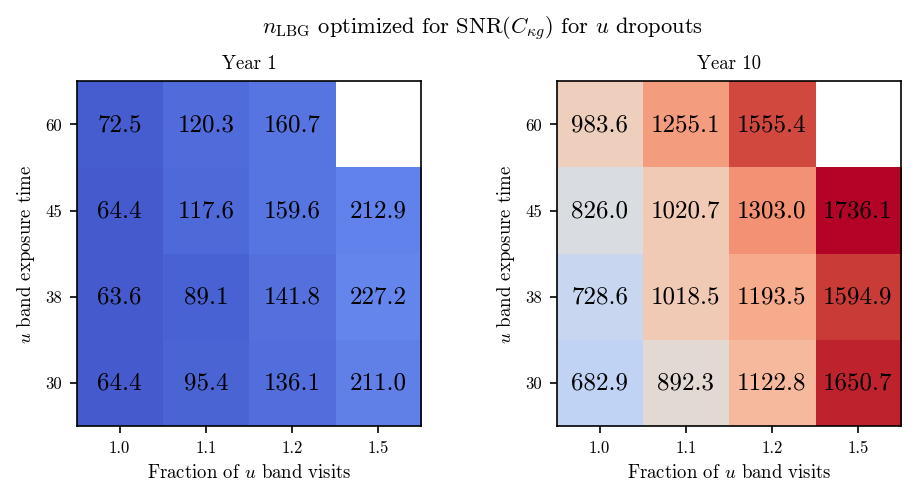

In [119]:
band = "u"
title = "$n_\mathrm{LBG}$ optimized for SNR($C_{\kappa g}$) for " + f"${band}$ dropouts"
plot_u_strategy_matrix(u_strat, band, "n_optim", title=title, vmin=0, vmax=1700)

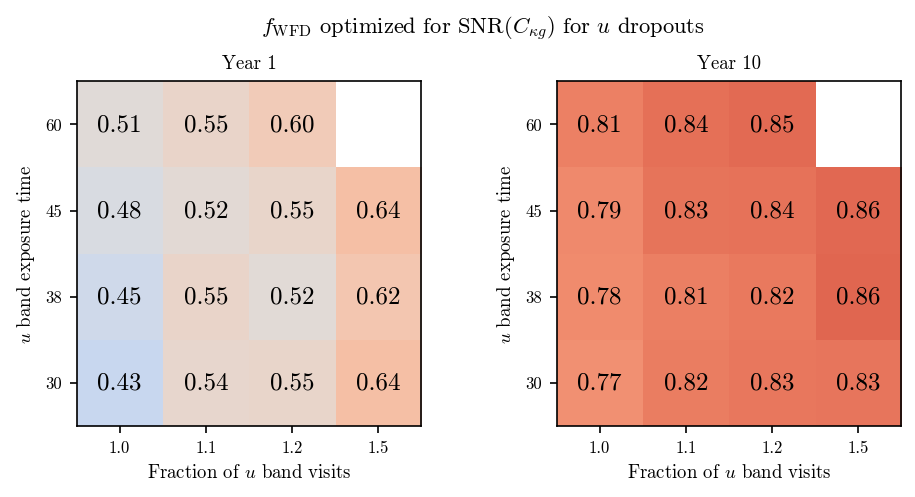

In [118]:
band = "u"
title = "$f_\mathrm{WFD}$ optimized for SNR($C_{\kappa g}$) for " + f"${band}$ dropouts"
plot_u_strategy_matrix(u_strat, band, "fwfd_optim", title=title, two_dec=True, vmin=0, vmax=1)

# Total number of LBGs (uniformity ignored)

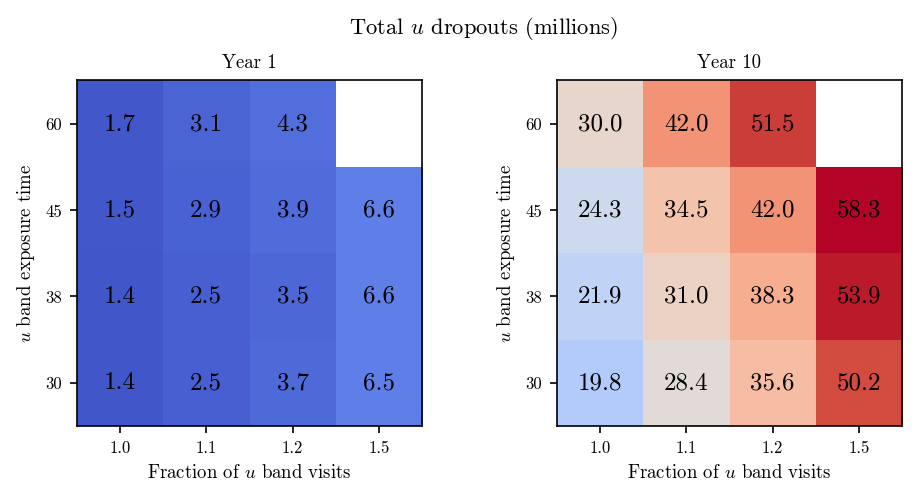

In [122]:
band = "u"
title = f"Total ${band}$ dropouts (millions)"
f"${band}$ dropout " + "$N_\mathrm{tot}$"
plot_u_strategy_matrix(u_strat, band, "Ntot", title=title, norm=1e6, vmin=0, vmax=55)

# Some plots for $g$, $r$

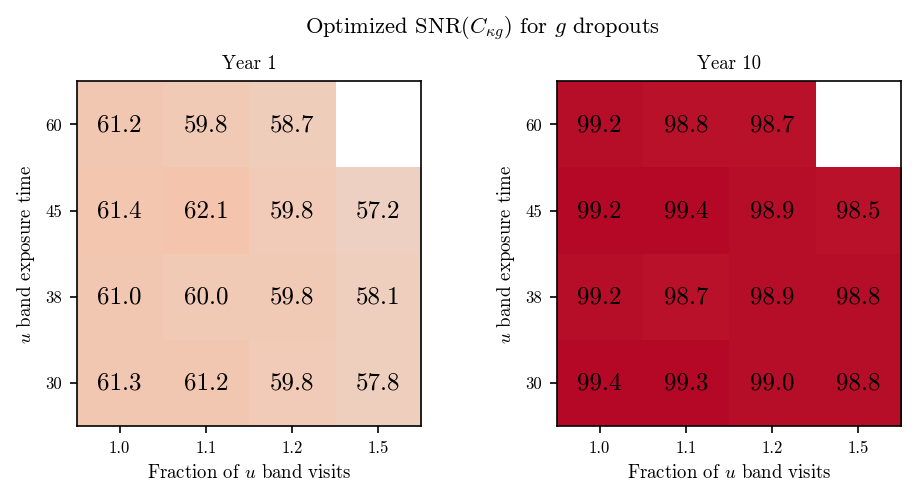

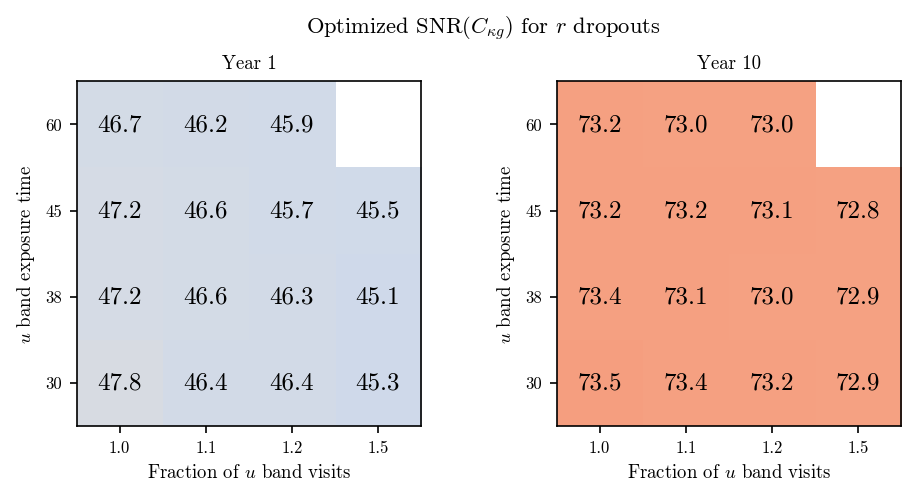

In [123]:
for band in "gr":
    title = "Optimized SNR($C_{\kappa g}$) for " + f"${band}$ dropouts"
    plot_u_strategy_matrix(u_strat, band, "snr_optim", title=title, vmin=0, vmax=100)

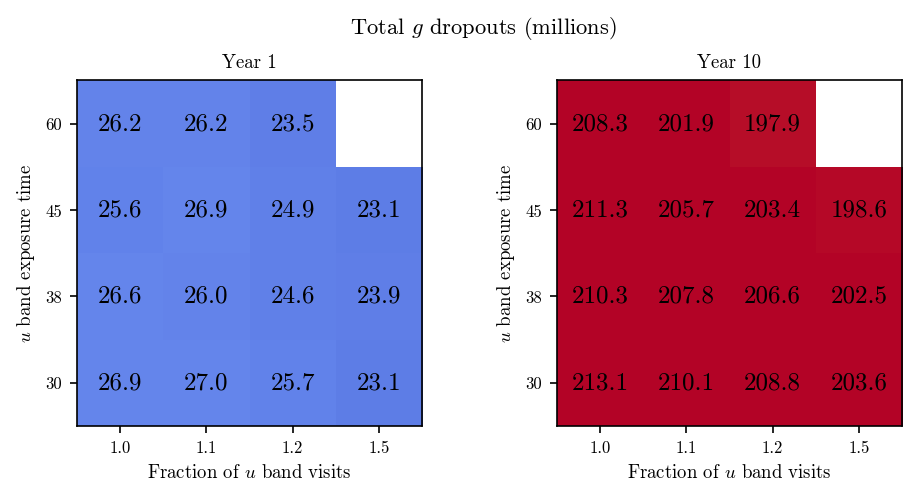

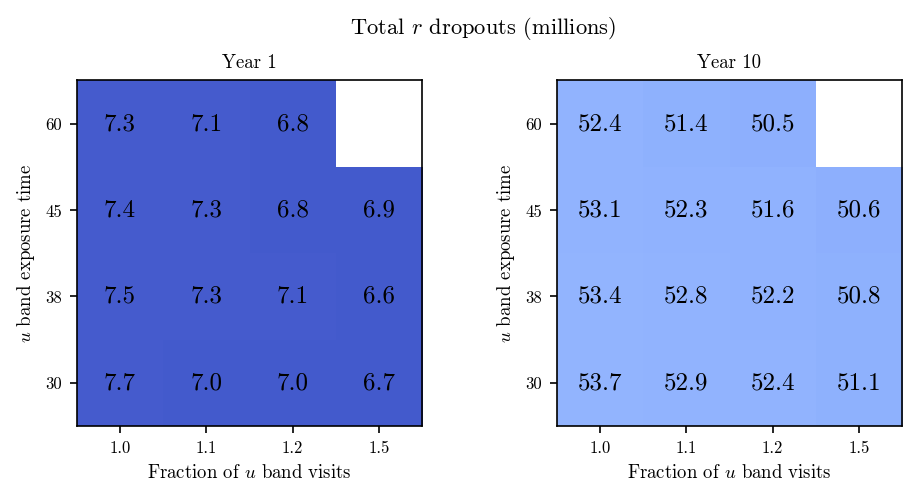

In [124]:
for band in "gr":
    title = f"Total ${band}$ dropouts (millions)"
    plot_u_strategy_matrix(u_strat, band, "Ntot", title=title, norm=1e6, vmin=0, vmax=200)